In [1]:
import xgboost
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import pycaret

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [25]:
df = pd.read_csv("wine_quality.csv", index_col = None, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
df['quality'] = df['quality'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


In [30]:
from pycaret.classification import *
setter = setup(data=df, target="quality", train_size=0.7, remove_outliers = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,7860
1,Target Type,Multiclass
2,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
3,Original Data,"(1599, 12)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [31]:
get_config("X_train")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1025,8.6,0.830,0.00,2.8,0.095,17.0,43.0,0.99822,3.33,0.60,10.4
694,9.0,0.470,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4
1015,10.5,0.390,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4
336,8.9,0.430,0.45,1.9,0.052,6.0,16.0,0.99480,3.35,0.70,12.5
952,8.2,0.310,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2
...,...,...,...,...,...,...,...,...,...,...,...
122,7.3,0.695,0.00,2.5,0.075,3.0,13.0,0.99800,3.49,0.52,9.2
1397,7.3,0.590,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9
579,10.6,0.310,0.49,2.2,0.063,18.0,40.0,0.99760,3.14,0.51,9.8
1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8


In [32]:
lgb_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6729,0.0000,0.3451,0.6492,0.6577,0.4767,0.4806
1,0.7103,0.0000,0.5313,0.6849,0.6950,0.5368,0.5403
2,0.5888,0.0000,0.2837,0.5554,0.5685,0.3295,0.3323
3,0.7358,0.0000,0.6357,0.7173,0.7221,0.5785,0.5839
4,0.7075,0.0000,0.4054,0.6714,0.6853,0.5199,0.5240
5,0.6887,0.0000,0.3403,0.6675,0.6745,0.4984,0.5027
6,0.6604,0.0000,0.3597,0.6294,0.6404,0.4455,0.4486
7,0.6415,0.0000,0.3241,0.6143,0.6269,0.4276,0.4288
8,0.6321,0.0000,0.3204,0.6080,0.6174,0.4096,0.4123
9,0.6792,0.0000,0.3407,0.6558,0.6630,0.4824,0.4873


In [33]:
predict_model(lgb_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6469,0,0.2999,0.6155,0.6286,0.4287,0.4314


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,7.1,0.680,0.00,2.2,0.073,12.0,22.0,0.99690,3.48,0.50,9.3,5,5,0.9967
1,7.1,0.620,0.06,1.3,0.070,5.0,12.0,0.99420,3.17,0.48,9.8,5,5,0.6089
2,6.8,0.560,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0,6,5,0.8820
3,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7,7,0.9809
4,8.3,0.850,0.14,2.5,0.093,13.0,54.0,0.99724,3.36,0.54,10.1,5,6,0.5496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,9.3,5,5,0.9966
452,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0,4,6,0.6611
453,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,6,0.8735
454,7.0,0.360,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1,6,6,0.9625


In [34]:
get_config("X_test")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
158,7.1,0.680,0.00,2.2,0.073,12.0,22.0,0.99690,3.48,0.50,9.3
1392,7.1,0.620,0.06,1.3,0.070,5.0,12.0,0.99420,3.17,0.48,9.8
452,6.8,0.560,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0
1361,8.3,0.850,0.14,2.5,0.093,13.0,54.0,0.99724,3.36,0.54,10.1
...,...,...,...,...,...,...,...,...,...,...,...
61,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,9.3
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
1314,7.0,0.360,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1


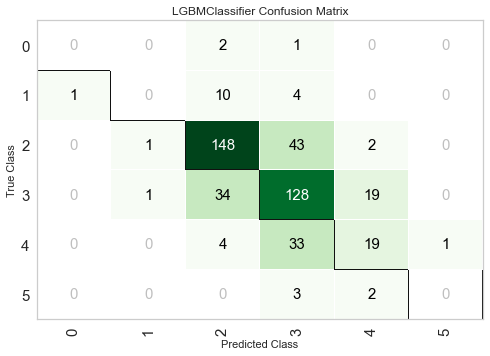

In [35]:
plot_model(lgb_model, plot='confusion_matrix')

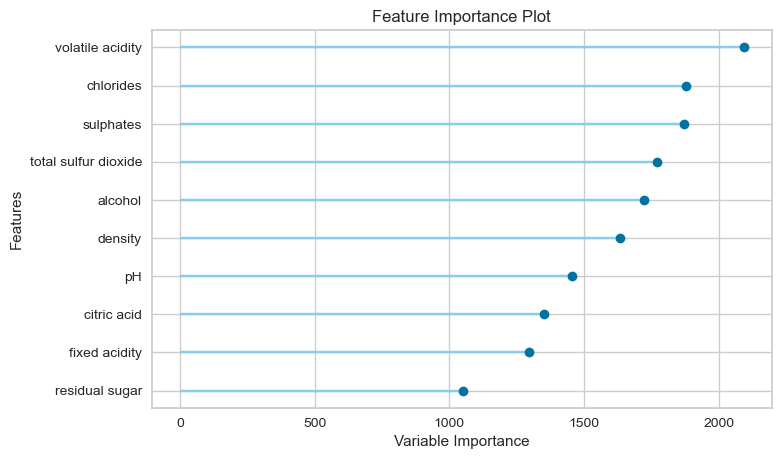

In [14]:
plot_model(lgb_model, plot="feature")

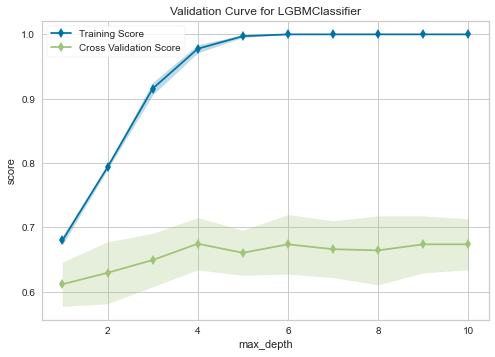

In [38]:
plot_model(lgb_model, plot='vc')

In [17]:
plot_model(lgb_model, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0
n_estimators,100
